# Extract annotation information from RBC-GEM
## Setup
### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from rbc_gem_utils import (
    COBRA_CONFIGURATION,
    ROOT_PATH,
    DATABASE_PATH,
    ANNOTATION_PATH,
    MODEL_PATH,
    INTERIM_PATH,
    read_rbc_model,
    show_versions,
    get_annotation_df,
    compare_tables,
    visualize_comparison,
)

# Display versions of last time notebook ran and worked
show_versions()


Package Information
-------------------
rbc-gem-utils 0.0.1

Dependency Information
----------------------
cobra      0.29.0
depinfo     2.2.0
matplotlib  3.8.2
memote     0.16.1
notebook    7.0.6
requests   2.31.0
scipy      1.11.4
seaborn    0.13.0

Build Tools Information
-----------------------
pip        23.3.1
setuptools 68.2.2
wheel      0.41.2

Platform Information
--------------------
Darwin  22.6.0-x86_64
CPython        3.12.0


### Define configuration
#### COBRA Configuration

In [2]:
COBRA_CONFIGURATION

Attribute,Description,Value
solver,Mathematical optimization solver,gurobi
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,15
cache_directory,Path for the model cache,/Users/zhaiman/Library/Caches/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


## Load RBC-GEM model
### Current Version: 0.2.0

In [3]:
model = read_rbc_model(filetype="xml")
model.reactions.sort()
model.genes.sort()
model.metabolites.sort()
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-28


Name,iAB_RBC_283
Memory address,14f71bfe0
Number of metabolites,342
Number of reactions,469
Number of genes,349
Number of groups,33
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


## Extract annotations from model


In [4]:
compare = True
overwrite = True

### Reactions

,reactions,bigg.reaction,biocyc,ec-code,kegg.reaction,metanetx.reaction,metatlas,reactome.reaction,rhea,sabiork,sbo,seed.reaction
0,3MOXTYRESSte,3MOXTYRESSte,NaN,NaN,NaN,MNXR94930,MAR11306,NaN,NaN,NaN,SBO:0000185,NaN
1,4PYRDXABCte,4PYRDX,NaN,NaN,NaN,MNXR95053,MAR08103,NaN,NaN,NaN,SBO:0000185,NaN
2,5AOPt2,5AOPt2,NaN,NaN,NaN,MNXR95061,MAR11307,NaN,NaN,NaN,SBO:0000185,rxn09702
3,ACALDt,ACALDt,NaN,NaN,NaN,MNXR95212,MAR04948,R-HSA-449872,NaN,NaN,SBO:0000185,rxn09700;rxn08033;rxn13212;rxn08032
4,ACGAM2E,ACGAM2E,META:RXN-16006,5.1.3.8,R01207,MNXR95247,MAR04527,NaN,NaN,1441,SBO:0000176,rxn00897
...,...,...,...,...,...,...,...,...,...,...,...,...
464,UREAt,UREAt,META:TRANS-RXN0-460,NaN,NaN,MNXR105156,MAR04949,R-DRE-444126;R-XTR-444126;R-SSC-507873;R-GGA-5...,32802;32799;32801;32800,NaN,SBO:0000185,rxn09369;rxn05667;rxn09368
465,URIt,URIt,NaN,NaN,NaN,MNXR105165,MAR05035,NaN,NaN,NaN,SBO:0000185,rxn10987;rxn09372
466,XYLK,XYLK,META:XYLULOKIN-RXN,2.7.1.17,R01639,MNXR105255,MAR04595,R-RNO-5662466;R-CEL-5662466;R-BTA-5662466;R-CF...,10966;10965;10964;10967,NaN,SBO:0000176,rxn01199
467,XYLTD_Dx,XYLTD_D,META:D-XYLULOSE-REDUCTASE-RXN,1.1.1.14;1.1.1.9,R01896,MNXR105262,MAR04593,R-HSA-5662471;R-XTR-5662471;R-DME-5662471;R-RN...,20435;20434;20433;20436,1954,SBO:0000176,rxn01385


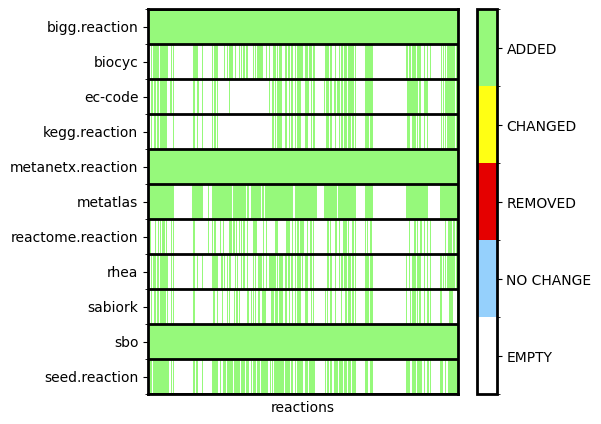

In [5]:
annotation_type = "reactions"
all_annotation_keys = set()
for annotation in getattr(model, annotation_type).list_attr("annotation"):
    all_annotation_keys.update(list(annotation.keys()))

# Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
df_annotations = get_annotation_df(
    getattr(model, annotation_type), sorted(list(all_annotation_keys))
).rename({
    "id": annotation_type
}, axis=1)

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type], dtype=str)
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Metabolites

,metabolites,bigg.metabolite,biocyc,chebi,envipath,hmdb,inchi_key,kegg.compound,kegg.drug,kegg.glycan,lipidmaps,metanetx.chemical,metatlas,reactome.compound,sabiork,sbo,seed.compound,slm
0,13dpg_c,13dpg,META:DPG,CHEBI:57604;CHEBI:20189;CHEBI:11881;CHEBI:1600...,NaN,HMDB62758,LJQLQCAXBUHEAZ-UWTATZPHSA-J,C00236,NaN,NaN,NaN,MNXM261,MAM00247c,29800,21215,SBO:0000247,cpd00203,NaN
1,23dpg_c,23dpg,META:23-DIPHOSPHOGLYCERATE,CHEBI:41885;CHEBI:11417;CHEBI:19307;CHEBI:1930...,NaN,HMDB01294,XOHUEYCVLUUEJJ-UWTATZPHSA-I,C03339;C01159,NaN,NaN,NaN,MNXM892,MAM00569c,6798337,20899;1355,SBO:0000247,cpd00853;cpd02119,NaN
2,2kmb_c,2kmb,META:CPD-479,CHEBI:43720;CHEBI:22458;CHEBI:1902;CHEBI:63388...,NaN,HMDB01553;HMDB13210,SXFSQZDSUWACKX-UHFFFAOYSA-M,C01180,NaN,NaN,LMFA01060170,MNXM276,MAM01016c,1237122,5424,SBO:0000247,cpd00869,NaN
3,2pg_c,2pg,META:2-PG,CHEBI:39868;CHEBI:21028;CHEBI:58289;CHEBI:2434...,NaN,HMDB00362;HMDB62707;HMDB03391,GXIURPTVHJPJLF-UWTATZPHSA-K,C00631,NaN,NaN,NaN,MNXM275,MAM00674c,30485,31,SBO:0000247,cpd00482,NaN
4,35camp_c,camp,META:CAMP,CHEBI:19827;CHEBI:11673;CHEBI:1325;CHEBI:17489...,NaN,HMDB00058,IVOMOUWHDPKRLL-KQYNXXCUSA-M,C00575,NaN,NaN,NaN,MNXM243,MAM01419c,30389,1379,SBO:0000247,cpd00446,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,xmp_c,xmp,META:XANTHOSINE-5-PHOSPHATE,CHEBI:10938;CHEBI:57464;CHEBI:27328;CHEBI:1532...,NaN,HMDB01554;HMDB62755,DCTLYFZHFGENCW-UUOKFMHZSA-L,C00655,NaN,NaN,NaN,MNXM298,MAM03150c,111584,1686,SBO:0000247,cpd00497,NaN
338,xu5p__D_c,xu5p__D,META:XYLULOSE-5-PHOSPHATE,CHEBI:13036;CHEBI:27354;CHEBI:4269;CHEBI:16332...,NaN,HMDB06212;HMDB00868,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,C00231,NaN,NaN,NaN,MNXM186,MAM01761c,29790,1317,SBO:0000247,cpd00198,NaN
339,xylt_c,xylt,META:XYLITOL,CHEBI:15328;CHEBI:17151;CHEBI:10078;CHEBI:6093...,NaN,NaN,HEBKCHPVOIAQTA-SCDXWVJYSA-N,C00379,D00061,NaN,NaN,MNXM510,MAM03155c,5660033,2033,SBO:0000247,cpd00306,NaN
340,xylu__D_c,xylu__D,META:D-XYLULOSE,CHEBI:4268;CHEBI:13035;CHEBI:46514;CHEBI:21120...,NaN,HMDB01644;HMDB00654,ZAQJHHRNXZUBTE-WUJLRWPWSA-N,C00310,NaN,NaN,NaN,MNXM597,MAM01759c,5661281,1504,SBO:0000247,cpd00259,NaN


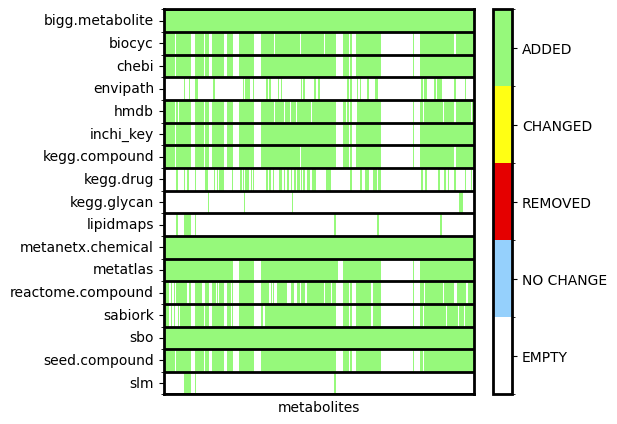

In [6]:
annotation_type = "metabolites"
all_annotation_keys = set()
for annotation in getattr(model, annotation_type).list_attr("annotation"):
    all_annotation_keys.update(list(annotation.keys()))

# Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
df_annotations = get_annotation_df(
    getattr(model, annotation_type), sorted(list(all_annotation_keys))
).rename({
    "id": annotation_type
}, axis=1)

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type], dtype=str)
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Genes

,genes,ccds,hprd,ncbigene,ncbigi,omim,refseq_name,refseq_synonym,sbo
0,10007_AT1,CCDS4272.1,09048,10007,NaN,601798,GNPDA1,GPI;HLN;GNP1;GNPI;GNPDA,SBO:0000243
1,100_AT1,CCDS13335.1,NaN,100,NaN,608958,ADA,NaN,SBO:0000243
2,10201_AT1,CCDS2763.1;CCDS77734.1;CCDS77733.1,NaN,10201,NaN,608294,NME6,NM23-H6;IPIA-ALPHA;NDK 6,SBO:0000243
3,10257_AT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SBO:0000243
4,10327_AT1,CCDS523.1,NaN,10327,NaN,103830,AKR1A1,DD3;HEL-S-6;ALDR1;ARM;ALR,SBO:0000243
...,...,...,...,...,...,...,...,...,...
344,8867_AT2,CCDS54484.1;CCDS54483.1;CCDS33540.2;CCDS33539.2,NaN,8867,NaN,604297,SYNJ1,PARK20;INPP5G,SBO:0000243
345,9162_AT1,CCDS5845.1,07238,9162,1012282641;1034657385;1034657393;1034657397;10...,604072,DGKI,DGK-IOTA,SBO:0000243
346,9429_AT1,CCDS58910.1;CCDS3628.1,NaN,9429,NaN,603756,ABCG2,MRX;CD338;BCRP1;MXR;GOUT1;ABCP;ABC15;CDw338;BC...,SBO:0000243
347,9468_AT1,CCDS14213.1;CCDS55392.1;CCDS55391.1,05376,9468,NaN,300948,PCYT1B,CTB;CCTB,SBO:0000243


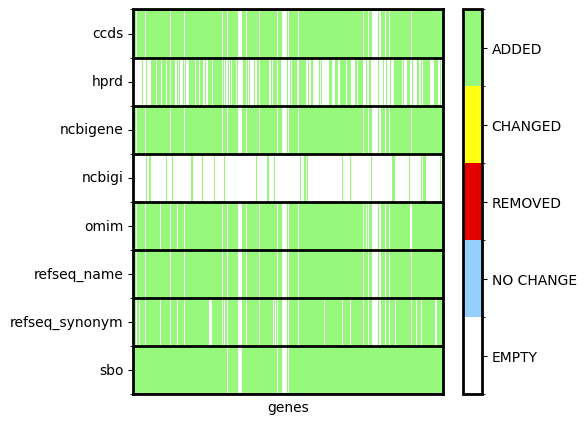

In [7]:
annotation_type = "genes"
all_annotation_keys = set()
for annotation in getattr(model, annotation_type).list_attr("annotation"):
    all_annotation_keys.update(list(annotation.keys()))

# Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
df_annotations = get_annotation_df(
    getattr(model, annotation_type), sorted(list(all_annotation_keys))
).rename({
    "id": annotation_type
}, axis=1)

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type], dtype=str)
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations